## Import dataset

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ddos_benign = pd.read_csv('dataset/ddos-benign.csv', index_col=0)

In [3]:
ddos_benign.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Benign,DDoS
0,0.000000,54.0,6.0,64.0,1.002455,1.002455,0.0,0.0,0.0,0.0,...,54.0,8.333188e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,0,1
1,4.086829,4058.2,15.9,95.5,127489.938539,127489.938539,0.0,0.0,0.0,0.0,...,89.6,1.665227e+08,13.5,11.730841,19.334533,191.596058,1.0,244.60,1,0
2,51.749030,230317.4,5.9,68.5,56.912786,56.912786,0.0,0.0,0.0,0.0,...,434.1,1.665200e+08,13.5,28.943250,875.398681,384961.151512,1.0,244.60,1,0
3,0.000000,0.0,1.0,64.0,3.959612,3.959612,0.0,0.0,0.0,0.0,...,42.0,8.312777e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,0,1
4,6.584890,529995.5,9.3,86.6,75.681010,75.681010,0.0,0.0,0.0,0.0,...,714.8,7.723689e-03,5.5,48.434086,667.603156,344603.608970,0.7,38.50,1,0


In [4]:
ddos_benign.drop('DDoS', inplace=True, axis=1)
ddos_benign.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Benign
0,0.000000,54.0,6.0,64.0,1.002455,1.002455,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.333188e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55,0
1,4.086829,4058.2,15.9,95.5,127489.938539,127489.938539,0.0,0.0,0.0,0.0,...,15.937614,89.6,1.665227e+08,13.5,11.730841,19.334533,191.596058,1.0,244.60,1
2,51.749030,230317.4,5.9,68.5,56.912786,56.912786,0.0,0.0,0.0,0.0,...,617.706128,434.1,1.665200e+08,13.5,28.943250,875.398681,384961.151512,1.0,244.60,1
3,0.000000,0.0,1.0,64.0,3.959612,3.959612,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312777e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,0
4,6.584890,529995.5,9.3,86.6,75.681010,75.681010,0.0,0.0,0.0,0.0,...,472.066718,714.8,7.723689e-03,5.5,48.434086,667.603156,344603.608970,0.7,38.50,1


In [5]:
X = ddos_benign.drop('Benign', inplace=False, axis=1)
# Label will be 1 if benign, 0 if not.
y = ddos_benign['Benign']

In [6]:
X.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.0,6.0,64.0,1.002455,1.002455,0.0,0.0,0.0,0.0,...,54.000000,0.000000,54.0,8.333188e+07,9.5,10.392305,0.000000,0.000000,0.0,141.55
1,4.086829,4058.2,15.9,95.5,127489.938539,127489.938539,0.0,0.0,0.0,0.0,...,69.614577,15.937614,89.6,1.665227e+08,13.5,11.730841,19.334533,191.596058,1.0,244.60
2,51.749030,230317.4,5.9,68.5,56.912786,56.912786,0.0,0.0,0.0,0.0,...,419.331331,617.706128,434.1,1.665200e+08,13.5,28.943250,875.398681,384961.151512,1.0,244.60
3,0.000000,0.0,1.0,64.0,3.959612,3.959612,0.0,0.0,0.0,0.0,...,42.000000,0.000000,42.0,8.312777e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55
4,6.584890,529995.5,9.3,86.6,75.681010,75.681010,0.0,0.0,0.0,0.0,...,1196.625476,472.066718,714.8,7.723689e-03,5.5,48.434086,667.603156,344603.608970,0.7,38.50


In [7]:
y.head()

0    0
1    1
2    1
3    0
4    1
Name: Benign, dtype: int64

## Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=4, stratify=y)

# Normalization

Min-Max Scaling: Scales the values so they fall within a defined range (0 and 1). The formula is:
$$\frac{x - \min(x)}{\max(x) - \min(x)}$$ 

Adjust the numerical values in the dataset to a common scale without distorting differences in the ranges of values.

This is going to be implemented after splitting the data to prevent bias.

In [9]:
scaler = MinMaxScaler()
# Normalize and return a dataframe
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

In [10]:
dataframes = [X_train, X_test, y_train, y_test]

# Prints the shape of each dataframe
for df in dataframes:
    print(df.shape)

(1300000, 46)
(700000, 46)
(1300000,)
(700000,)


In [11]:
X_train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000126,0.176725,0.352941,0.254372,7.744070e-06,7.744070e-06,0.0,0.0,0.0,0.0,...,0.131108,0.212755,0.201471,9.999677e-01,0.892857,0.325657,0.213246,4.023186e-02,1.00,1.000000
1,0.000094,0.064664,0.352941,0.252782,1.549852e-05,1.549852e-05,0.0,0.0,0.0,0.0,...,0.029439,0.044179,0.090732,9.999839e-01,0.892857,0.119947,0.044082,2.132121e-03,1.00,1.000000
2,0.000039,0.091070,0.417647,0.254372,1.278327e-05,1.278327e-05,0.0,0.0,0.0,0.0,...,0.125551,0.010373,0.105247,3.353224e-12,0.321429,0.317741,0.010373,3.689006e-04,0.30,0.153941
3,0.000000,0.000006,0.352941,0.254372,2.322112e-07,2.322112e-07,0.0,1.0,0.0,1.0,...,0.001034,0.000000,0.000919,5.005107e-01,0.607143,0.008553,0.000000,0.000000e+00,0.00,0.576970
4,0.000000,0.000006,0.355882,0.251312,5.097152e-06,5.097152e-06,0.0,0.0,1.0,0.0,...,0.001036,0.000010,0.000951,4.989806e-01,0.607143,0.008557,0.000002,2.615030e-10,0.02,0.576970


## Models Implementation
SVM, Logistic Regression, kNN

### Logistic Regression

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 99.67%


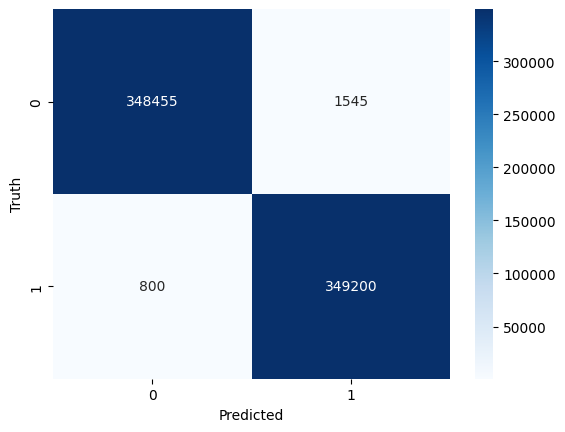

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Support Vector Machine

Accuracy: 100.00%


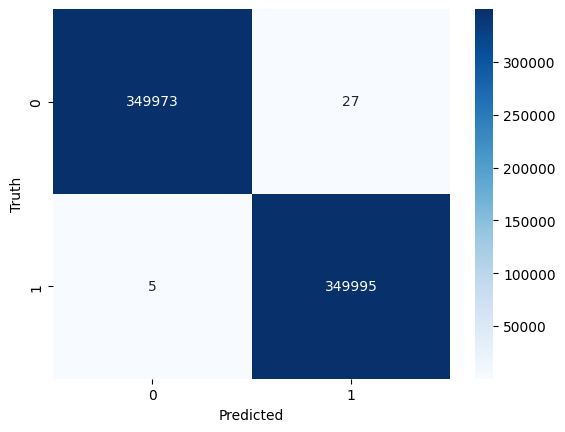

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a SVM model
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


### KNN

### XGBoost

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Accuracy: 100.00%


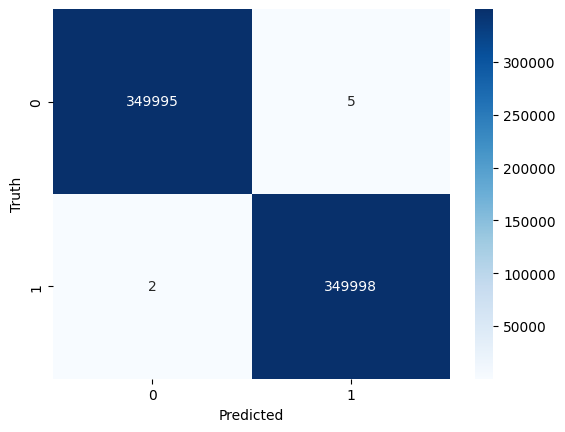

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Create a XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}%')

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
